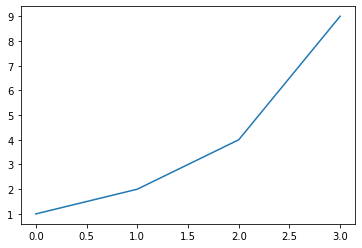

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([1,2,4,9])
plt.show()



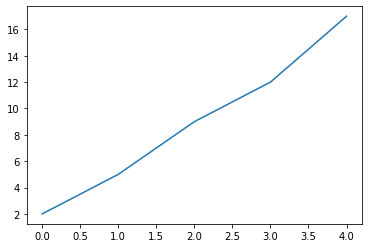

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot([2,5,9,12,17])
plt.show()



In [56]:
%%latex
\begin{align}
c = \sqrt{a^2 + b^2} \\
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0
\end{align}

<IPython.core.display.Latex object>

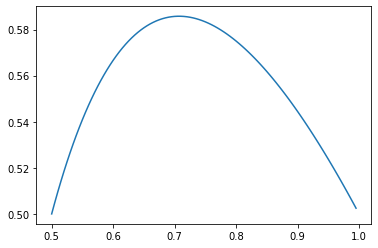

In [57]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
x=np.arange(0.5, 1, 0.005)
y=(-0.5+2*x-x*x)/x
plt.plot(x,y)
plt.show()


# Problem {-}
![problem.jpeg](problem.jpeg)

# Answer {.unnumbered}

In [58]:
%%latex
Let $\rm{Prob}\{\mathbf{e}\}$ be the probability of an event $\mathbf{e}$ occurs. Thus $P(a)$ is:
    \begin{equation}
    P(a) = \rm{Prob}\{ \sin^2(\pi x) + \sin^2(\pi y) \gt 1\},
    \end{equation}
where $x$ and $y$ be chosen independently at uniformly random from the interval $[0, a]$ and $[0, 1]$, respectively.


<IPython.core.display.Latex object>

In [59]:
%%latex
Because,
\begin{align*}
\sin^2(\pi x) + \sin^2(\pi y) \gt 1
& \Rightarrow \frac{1-\cos(2\pi x)}{2} + \frac{1-\cos(2\pi y)}{2} \gt 1 &&\text{(pakai rumus $\cos(2\alpha)$)} \\
& \Rightarrow 2 - [\cos(2\pi x) + \cos(2\pi y)] \gt 2 \\
& \Rightarrow - [\cos(2\pi x) + \cos(2\pi y)] \gt 0 \\
& \Rightarrow \cos(2\pi x) + \cos(2\pi y) \lt 0 \\
& \Rightarrow 2\cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0 && \text{(pakai rumus $\cos\alpha + \cos\beta$)}\\
& \Rightarrow \cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0
\end{align*}


<IPython.core.display.Latex object>

In [60]:
%%latex
so, the above event is identical with:
    \begin{equation}
    P(a) = \rm{Prob}\{ \cos(\pi(x+y)) \times \cos(\pi(x-y)) \lt 0 \}.
    \end{equation}


<IPython.core.display.Latex object>